# Predictions

In this notebook, we are concerned about experimenting with different models to see which ones best predict student demand. Exploration of the data is done, and should be done, in the *Exploration* notebook

In [1]:
import pickle
import sys, os
import re
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
sys.path.append(os.path.join(os.getcwd(), 'code'))
    
import numpy as np
%matplotlib inline

In [2]:
xme = pickle.load(open('x_model_errors.pkl'))
model_errors = xme[xme.index != '2016-9']

In [3]:
def filter_model_names(column_names):
    names = []
    for i in column_names:
        match = re.search(r'\w+Model$', i)
        if match:
            names.append(match.group(0))

        
    return names
    

In [4]:
model_names = filter_model_names(model_errors.columns)

In [5]:
model_names

['InterpolatedProbModel',
 'LFTProbModel',
 'LFProbModel',
 'TimezoneProbModel',
 'GeneralProbModel',
 'SmartHeuristicModel',
 'DumbModel']

In [6]:
model_names_with_test_data_size = list(model_names)

In [7]:
model_names_with_test_data_size.append('test_data_size')

In [8]:
model_names

['InterpolatedProbModel',
 'LFTProbModel',
 'LFProbModel',
 'TimezoneProbModel',
 'GeneralProbModel',
 'SmartHeuristicModel',
 'DumbModel']

In [9]:
model_names_with_test_data_size

['InterpolatedProbModel',
 'LFTProbModel',
 'LFProbModel',
 'TimezoneProbModel',
 'GeneralProbModel',
 'SmartHeuristicModel',
 'DumbModel',
 'test_data_size']

In [10]:
model_errors.columns

Index([u'InterpolatedProbModel', u'InterpolatedProbModel_predictions',
       u'LFTProbModel', u'LFTProbModel_predictions', u'LFProbModel',
       u'LFProbModel_predictions', u'TimezoneProbModel',
       u'TimezoneProbModel_predictions', u'GeneralProbModel',
       u'GeneralProbModel_predictions', u'SmartHeuristicModel',
       u'SmartHeuristicModel_predictions', u'DumbModel',
       u'DumbModel_predictions', u'test_data_size', u'actuals'],
      dtype='object')

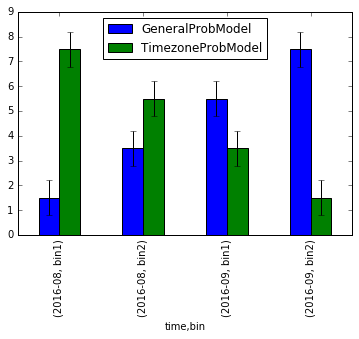

In [11]:
# Generate the data
ix3 = pd.MultiIndex.from_arrays([['2016-08',
                                  '2016-08',
                                  '2016-08',
                                  '2016-08', 
                                  '2016-09', 
                                  '2016-09', 
                                  '2016-09', 
                                  '2016-09'], 
                                 ['bin1',
                                  'bin1',
                                  'bin2',
                                  'bin2',
                                  'bin1',
                                  'bin1',
                                  'bin2',
                                  'bin2']], names=['time', 'bin'])

df3 = pd.DataFrame({'GeneralProbModel': [1, 2, 3, 4, 5, 6, 7, 8], 
                    'TimezoneProbModel': [8, 7, 6, 5, 4, 3, 2, 1]}, index=ix3)

# Group by index labels and take the means and standard deviations for each group
gp3 = df3.groupby(level=('time', 'bin'))

means = gp3.mean()

errors = gp3.std()

means

errors
fig, ax = plt.subplots()

means.plot.bar(yerr=errors, ax=ax)

In [12]:
ix3

MultiIndex(levels=[[u'2016-08', u'2016-09'], [u'bin1', u'bin2']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1]],
           names=[u'time', u'bin'])

In [13]:
means

GeneralProbModel  TimezoneProbModel
time    bin                                      
2016-08 bin1               1.5                7.5
        bin2               3.5                5.5
2016-09 bin1               5.5                3.5
        bin2               7.5                1.5

In [14]:
df3

GeneralProbModel  TimezoneProbModel
time    bin                                      
2016-08 bin1                 1                  8
        bin1                 2                  7
        bin2                 3                  6
        bin2                 4                  5
2016-09 bin1                 5                  4
        bin1                 6                  3
        bin2                 7                  2
        bin2                 8                  1

In [15]:
errors

GeneralProbModel  TimezoneProbModel
time    bin                                      
2016-08 bin1          0.707107           0.707107
        bin2          0.707107           0.707107
2016-09 bin1          0.707107           0.707107
        bin2          0.707107           0.707107

In [16]:
(model_errors['InterpolatedProbModel_predictions'] - model_errors['actuals'])[['2015-11', '2015-12']]

2015-11    [-0.183572308492, -2.10586295856, -7.447840273...
2015-12    [3.87939035766, 0.414581393322, -30.5632936333...
dtype: object

In [17]:
(model_errors['InterpolatedProbModel_predictions'] - model_errors['actuals']).index

Index([u'2015-9', u'2015-10', u'2015-11', u'2015-12', u'2016-1', u'2016-2',
       u'2016-3', u'2016-4', u'2016-5', u'2016-6', u'2016-7', u'2016-8'],
      dtype='object')

In [18]:
def build_error_table_per_bin_over_time(model_errors, model_name):
    indices = (model_errors['{}_predictions'.format(model_name)] - model_errors['actuals']).index
    errors = binnify(model_errors, model_name)
    column_length = errors.shape[1]
    errors_df = pd.DataFrame()
    for c in range(column_length):
        errors_df['bin {}'.format(c)] = errors[:,c]
        
    errors_df['sample size'] = model_errors['test_data_size'].values
    
    
    return errors_df.set_index(indices).round(2)

In [19]:
def binnify(me_df, model_name):
    errors = (me_df['{}_predictions'.format(model_name)] - model_errors.actuals).values
    new_arr = []
    for i in errors:
        new_arr.append(i)
        
    return np.array(new_arr)

In [20]:
print build_error_table_per_bin_over_time(model_errors, 'InterpolatedProbModel').to_latex()

\begin{tabular}{lrrrrrrr}
\toprule
{} &  bin 0 &  bin 1 &  bin 2 &  bin 3 &  bin 4 &  bin 5 &  sample size \\
\midrule
2015-9  &  -2.34 &   5.85 &   9.80 &  -7.31 &  -6.23 &   0.23 &        125.0 \\
2015-10 &   1.38 &   2.81 & -11.80 &   1.21 &   1.33 &   5.07 &        120.0 \\
2015-11 &  -0.18 &  -2.11 &  -7.45 &   6.61 &  -1.32 &   4.45 &         55.0 \\
2015-12 &   3.88 &   0.41 & -30.56 & -17.63 &  33.26 &  10.64 &        199.0 \\
2016-1  &  -1.23 &   2.29 & -10.74 &  -1.65 &   5.44 &   5.89 &        137.0 \\
2016-2  &   2.30 &  -3.16 &   8.12 &   2.12 &  -3.95 &  -5.42 &        141.0 \\
2016-3  &   4.02 &  20.75 & -27.48 &   8.47 &  12.10 & -17.85 &        485.0 \\
2016-4  &   1.49 &   5.10 &  -6.30 &  -5.05 &  -4.39 &   9.16 &        119.0 \\
2016-5  &   1.47 &   5.14 & -10.65 &   0.89 &   5.89 &  -2.73 &        120.0 \\
2016-6  &   1.25 &   4.08 &  11.51 &  -4.27 & -10.48 &  -2.08 &        173.0 \\
2016-7  &  -0.86 &   9.87 &  -4.15 &  -1.34 &   6.79 & -10.32 &        548.0 \\
2

In [21]:
teacher_desired_hours = np.array([0, 5, 6, 6, 6, 8, 10, 10, 10, 10, 10, 10, 10, 11, 12, 12, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
          16, 17, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 23, 24, 25, 25, 25, 25, 25, 25, 25, 28, 30, 30, 30, 30, 30, 
          30, 30, 30, 30, 30, 32, 35, 35, 40, 40, 40, 45, 50])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d80b390>]], dtype=object)

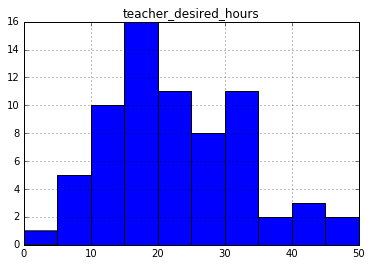

In [22]:
desired_hours_df = pd.DataFrame({'teacher_desired_hours': teacher_desired_hours})
desired_hours_df.hist()

In [23]:
desired_hours_df.mean()

teacher_desired_hours    20.73913
dtype: float64

In [24]:
 model_errors.test_data_size

2015-9     125.0
2015-10    120.0
2015-11     55.0
2015-12    199.0
2016-1     137.0
2016-2     141.0
2016-3     485.0
2016-4     119.0
2016-5     120.0
2016-6     173.0
2016-7     548.0
2016-8     239.0
Name: test_data_size, dtype: float64

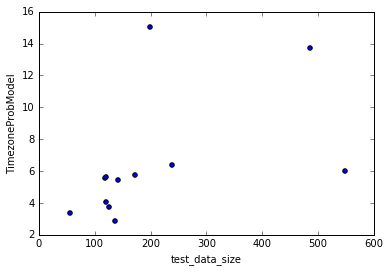

In [25]:
 model_errors[['TimezoneProbModel', 'test_data_size']].plot.scatter(x='test_data_size', y='TimezoneProbModel')

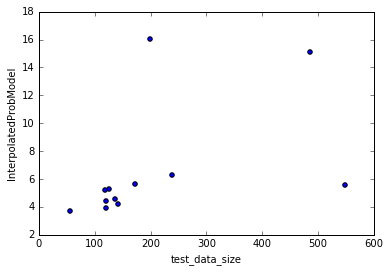

In [26]:
 model_errors.plot.scatter(x='test_data_size', y='InterpolatedProbModel')

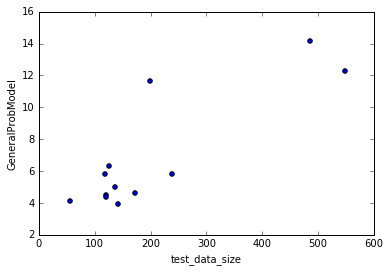

In [27]:
 model_errors.plot.scatter(x='test_data_size', y='GeneralProbModel')

In [28]:
binnify(model_errors, 'InterpolatedProbModel').shape

(12, 6)

In [29]:
binnify(model_errors, 'TimezoneProbModel')[:,5].std()

9.9407990199965752

In [30]:
def graph_3d(model_name):

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    #X, Y, Z = axes3d.get_test_data(0.05)

    X = np.mgrid[1:7,:12][1].T # Bins
    Y = np.mgrid[1:7,:12][0].T # Months
    Z = binnify(model_errors, model_name)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.3)
    cset = ax.contour(X, Y, Z, zdir='z', offset=-150, cmap=cm.coolwarm)
    cset = ax.contour(X, Y, Z, zdir='x', offset=-2, cmap=cm.coolwarm)
    cset = ax.contour(X, Y, Z, zdir='y', offset=8, cmap=cm.coolwarm)

    ax.set_xlabel('months')
    ax.set_xlim(-2, 13)
    ax.set_ylabel('bins')
    ax.set_ylim(0, 8)
    ax.set_zlabel('signed error')
    ax.set_zlim(-150, 100)
    ax.set_title("{} errors".format(model_name))
    plt.tight_layout()
    plt.show()


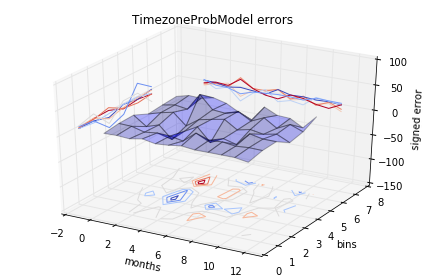

In [31]:
graph_3d('TimezoneProbModel')

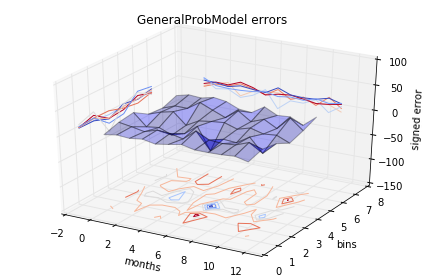

In [32]:
graph_3d('GeneralProbModel')

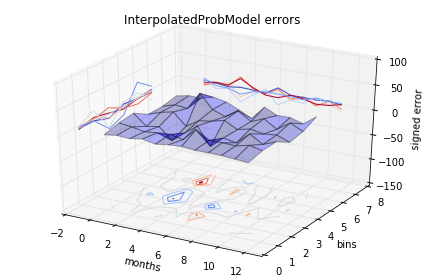

In [33]:
graph_3d('InterpolatedProbModel')

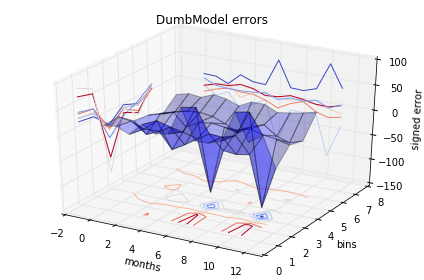

In [34]:
graph_3d('DumbModel')

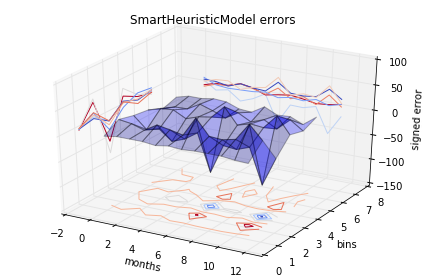

In [35]:
graph_3d('SmartHeuristicModel')

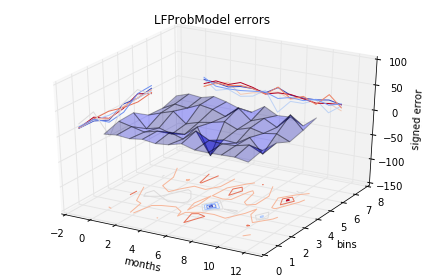

In [36]:
graph_3d('LFProbModel')

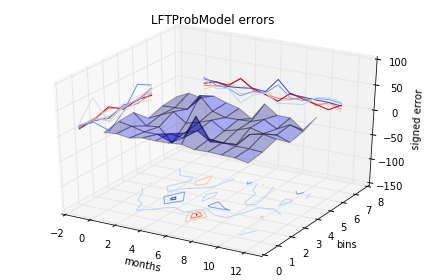

In [37]:
graph_3d('LFTProbModel')

In [38]:
binnify(model_errors, 'DumbModel')[3]

array([ 32.16666667,  24.16666667, -48.83333333, -18.83333333,
        -4.83333333,  16.16666667])

In [39]:
binnify(model_errors, 'GeneralProbModel')

array([[ -1.8879668 ,   7.02766252,  11.17150761,  -7.09197787,
         -9.89142462,   0.67219917],
       [  2.16413975,   2.93869479, -12.56163481,   1.54449572,
         -0.88398154,   6.79828609],
       [  0.38683887,  -1.97478475,  -9.25645756,   7.14760148,
         -1.21832718,   4.91512915],
       [  3.62507645,   5.84892966, -19.56146789, -15.48623853,
         15.06666667,  10.50703364],
       [ -1.16022409,   3.97759104, -11.94733894,  -1.98151261,
          4.38207283,   6.72941176],
       [  3.00159659,  -1.94465141,   7.25066525,   1.56412986,
         -5.90580096,  -3.96593933],
       [  7.75855131,  18.37474849, -36.32444668,   4.02263581,
         12.39738431,  -6.22887324],
       [  2.04584527,   5.74498567,  -8.5730659 ,  -4.27507163,
         -4.70200573,   9.75931232],
       [  1.98503348,   3.609295  , -10.565577  ,   2.83536826,
          4.76801891,  -2.63213864],
       [  2.70106626,   5.87014471,   5.31035796,  -4.16831683,
         -8.86062452,  -0.8

In [40]:
binnify(model_errors, 'InterpolatedProbModel')

array([[ -2.34166169,   5.85337835,   9.80113806,  -7.31483823,
         -6.22633524,   0.22831875],
       [  1.3782603 ,   2.81418975, -11.80115439,   1.20974844,
          1.32659229,   5.07236361],
       [ -0.18357231,  -2.10586296,  -7.44784027,   6.60885542,
         -1.32365009,   4.45207021],
       [  3.87939036,   0.41458139, -30.56329363, -17.63258588,
         33.25976637,  10.6421414 ],
       [ -1.23294977,   2.28687515, -10.74113547,  -1.6450729 ,
          5.43926415,   5.89301885],
       [  2.29845931,  -3.16300341,   8.11801594,   2.12112269,
         -3.9525595 ,  -5.42203503],
       [  4.01567988,  20.74509069, -27.48398204,   8.4682643 ,
         12.10091278, -17.84596561],
       [  1.48706807,   5.09766955,  -6.29633467,  -5.052612  ,
         -4.39180765,   9.15601671],
       [  1.46556512,   5.13756225, -10.64885097,   0.88889561,
          5.88663401,  -2.72980602],
       [  1.2460352 ,   4.08228717,  11.50985129,  -4.27071296,
        -10.4837825 ,  -2.0

In [41]:
binnify(model_errors, 'LFProbModel')[3]

array([  3.26073479,   3.79695669, -17.43901642, -12.50476897,
        10.42438181,  12.4617121 ])

In [42]:
binnify(model_errors, 'GeneralProbModel')[6]

array([  7.75855131,  18.37474849, -36.32444668,   4.02263581,
        12.39738431,  -6.22887324])

In [43]:
binnify(model_errors, 'InterpolatedProbModel')[6]

array([  4.01567988,  20.74509069, -27.48398204,   8.4682643 ,
        12.10091278, -17.84596561])

In [44]:
binnify(model_errors, 'GeneralProbModel')[10]

array([  4.88205681,  15.30169004, -21.79575692,  -1.88313556,
        16.69471413, -13.1995685 ])

In [45]:
def graph_error_bars(model_errors, model_name):
    binned = binnify(model_errors, model_name)
    means = binned.mean(axis=0)
    stds = binned.std(axis=0)
    axes = plt.gca()
    axes.set_xlim(-1,6)
    axes.set_ylim(-100,80)
    axes.set_title("{} error bars".format(model_name))
    axes.set_xlabel('bins')
    axes.set_ylabel('prediction - actual')
    for i, mean in enumerate(means.tolist()):
        plt.errorbar(i, mean, yerr=stds[i], fmt='o')
    
    #print "means: {}".format(means)
    #print "stds: {}".format(stds)
    #return means

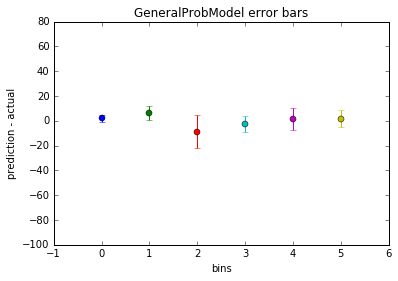

In [46]:
graph_error_bars(model_errors,'GeneralProbModel')

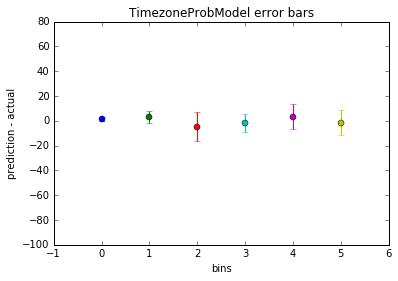

In [47]:
graph_error_bars(model_errors,'TimezoneProbModel')

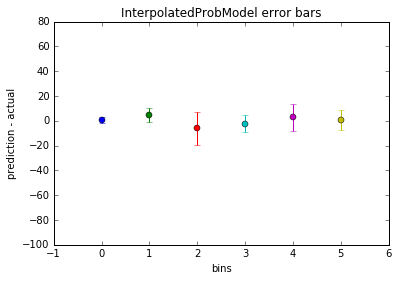

In [48]:
graph_error_bars(model_errors,'InterpolatedProbModel')

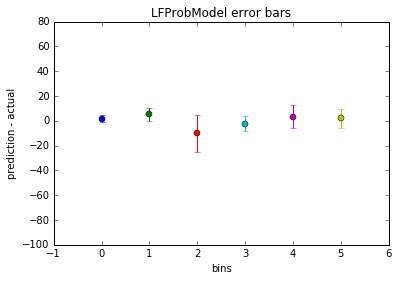

In [49]:
graph_error_bars(model_errors,'LFProbModel')

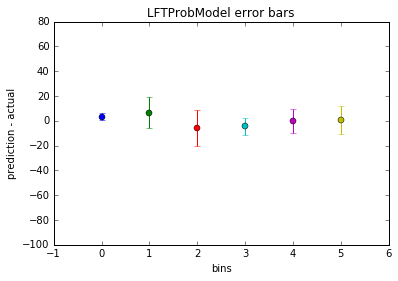

In [50]:
graph_error_bars(model_errors,'LFTProbModel')

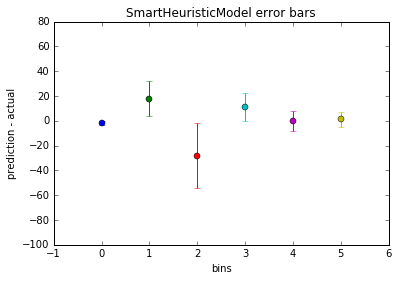

In [51]:
graph_error_bars(model_errors,'SmartHeuristicModel')

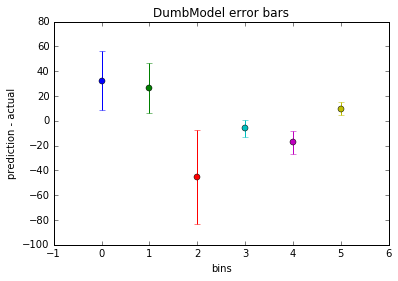

In [52]:
graph_error_bars(model_errors,'DumbModel')

In [53]:
binnify(model_errors, 'InterpolatedProbModel')[10]

array([ -0.85660432,   9.87239753,  -4.15099322,  -1.33533161,
         6.78561326, -10.31508163])

In [54]:
model_errors.test_data_size

2015-9     125.0
2015-10    120.0
2015-11     55.0
2015-12    199.0
2016-1     137.0
2016-2     141.0
2016-3     485.0
2016-4     119.0
2016-5     120.0
2016-6     173.0
2016-7     548.0
2016-8     239.0
Name: test_data_size, dtype: float64

In [55]:
np.array([np.array([1,2]),
          np.array([3,4])]).shape

(2, 2)

In [56]:
x = np.array([np.array([1,2,3]),
          np.array([3,4,5])]).reshape(2,3)
x.T

array([[1, 3],
       [2, 4],
       [3, 5]])

In [57]:
np.swapaxes(x,0,1).T

array([[1, 2, 3],
       [3, 4, 5]])

In [58]:
(model_errors['InterpolatedProbModel_predictions'] - model_errors['actuals']).values

array([ array([-2.34166169,  5.85337835,  9.80113806, -7.31483823, -6.22633524,
        0.22831875]),
       array([  1.3782603 ,   2.81418975, -11.80115439,   1.20974844,
         1.32659229,   5.07236361]),
       array([-0.18357231, -2.10586296, -7.44784027,  6.60885542, -1.32365009,
        4.45207021]),
       array([  3.87939036,   0.41458139, -30.56329363, -17.63258588,
        33.25976637,  10.6421414 ]),
       array([ -1.23294977,   2.28687515, -10.74113547,  -1.6450729 ,
         5.43926415,   5.89301885]),
       array([ 2.29845931, -3.16300341,  8.11801594,  2.12112269, -3.9525595 ,
       -5.42203503]),
       array([  4.01567988,  20.74509069, -27.48398204,   8.4682643 ,
        12.10091278, -17.84596561]),
       array([ 1.48706807,  5.09766955, -6.29633467, -5.052612  , -4.39180765,
        9.15601671]),
       array([  1.46556512,   5.13756225, -10.64885097,   0.88889561,
         5.88663401,  -2.72980602]),
       array([  1.2460352 ,   4.08228717,  11.50985129,  -4.

In [59]:
def confidence_interval(val, model_error):
    diff = 1 - val
    num_runs = 10000
    lower_index = num_runs * diff / 2.0
    upper_index = num_runs * (val + diff/2.0)
    avgs = []
    for i in range(num_runs):
        samples = []
        size = model_errors.shape[0]
        for j in range(size):
            samples.append(np.random.choice(model_error.values, size))
        avgs.append( np.array(samples).mean())
    
    sorted_avgs = np.sort(avgs)

    return (sorted_avgs[lower_index], sorted_avgs[upper_index],)
        
    
    

In [60]:
def print_confidence_interval(perc, model_errors, model_names):
    dictionary = {}
    for name in model_names:
        dictionary[name] = confidence_interval(0.95, model_errors[name])
    return dictionary

In [61]:
model_errors_me = model_errors[model_names]

In [62]:
model_errors['test_data_size'].values

array([ 125.,  120.,   55.,  199.,  137.,  141.,  485.,  119.,  120.,
        173.,  548.,  239.])

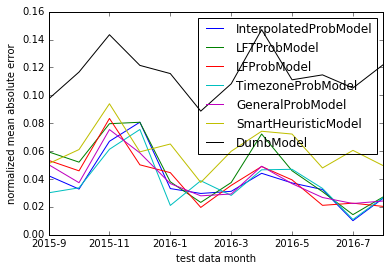

In [63]:
normalized_mae = model_errors_me.apply(lambda x: x / model_errors.test_data_size)
ax = normalized_mae.plot()
ax.set_xlabel('test data month')
ax.set_ylabel('normalized mean absolute error')

In [64]:
normalized_mae['DumbModel']

2015-9     0.097333
2015-10    0.116667
2015-11    0.143434
2015-12    0.121441
2016-1     0.115572
2016-2     0.088652
2016-3     0.108247
2016-4     0.147059
2016-5     0.111111
2016-6     0.114644
2016-7     0.105231
2016-8     0.122036
Name: DumbModel, dtype: float64

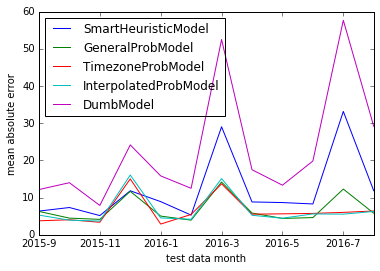

In [65]:
ax = model_errors_me[['SmartHeuristicModel', 'GeneralProbModel', 'TimezoneProbModel', 'InterpolatedProbModel', 'DumbModel']].plot()
ax.set_xlabel('test data month')
ax.set_ylabel('mean absolute error')

In [66]:
(model_errors_me.mean() * model_errors_me.std()).sort_values()

TimezoneProbModel         25.008485
GeneralProbModel          25.011525
InterpolatedProbModel     28.268324
LFProbModel               29.278000
LFTProbModel              36.110293
SmartHeuristicModel      110.791707
DumbModel                369.880235
dtype: float64

In [67]:
model_errors_me.std().sort_values()

GeneralProbModel          3.628328
TimezoneProbModel         3.866833
LFProbModel               4.168732
InterpolatedProbModel     4.242122
LFTProbModel              4.578422
SmartHeuristicModel       9.184805
DumbModel                16.049444
dtype: float64

In [68]:
(model_errors_me.mean()).sort_values()

TimezoneProbModel         6.467433
InterpolatedProbModel     6.663722
GeneralProbModel          6.893402
LFProbModel               7.023239
LFTProbModel              7.887060
SmartHeuristicModel      12.062500
DumbModel                23.046296
dtype: float64

In [69]:
model_errors['TimezoneProbModel_predictions'] - model_errors['actuals']

2015-9     [0.548267042643, 4.77558257724, 5.96595654778,...
2015-10    [1.30106709515, 3.82102346228, -12.1246526435,...
2015-11    [-0.436485568296, -2.8921128237, -4.0351899573...
2015-12    [4.17986871954, 0.17078284351, -28.3888285738,...
2016-1     [-0.517506161874, -0.991839717378, -7.14563474...
2016-2     [1.44189765509, -6.06004813363, 6.34252958556,...
2016-3     [5.24592717851, 14.2402630284, -20.059624601, ...
2016-4     [2.03592858875, 5.27612297094, -7.38097223425,...
2016-5     [2.35854279103, 6.7307990671, -14.1367090536, ...
2016-6     [2.23720933486, 3.45024619657, 11.5665378665, ...
2016-7     [2.24682954784, 5.39819361366, 6.32619244384, ...
2016-8     [-1.78680182699, 4.73512115841, 6.00707738325,...
dtype: object

In [70]:
model_errors.columns

Index([u'InterpolatedProbModel', u'InterpolatedProbModel_predictions',
       u'LFTProbModel', u'LFTProbModel_predictions', u'LFProbModel',
       u'LFProbModel_predictions', u'TimezoneProbModel',
       u'TimezoneProbModel_predictions', u'GeneralProbModel',
       u'GeneralProbModel_predictions', u'SmartHeuristicModel',
       u'SmartHeuristicModel_predictions', u'DumbModel',
       u'DumbModel_predictions', u'test_data_size', u'actuals'],
      dtype='object')

#Sensitivity Analysis

In [71]:
sa_df = pickle.load(open('data/sensitivity_analysis.pkl'))

In [72]:
sa_df[filter_model_names(sa_df)]

,InterpolatedProbModel,TimezoneProbModel,GeneralProbModel
2016-10,17.976042,172.883495,13.341391
2016-11,0.676617,0.645111,11.728293


In [73]:
uus_df = pickle.load(open('data/sensitivity_analysis.pkl'))